In [1]:
import re

import pytz as tz
from datetime import datetime

import numpy as np
np.random.seed(1337)

import xlrd

import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

In [3]:
import os
import shutil

datadir = '../data'

In [4]:
filename = os.path.join(datadir, 'default of credit card clients.xls')

In [5]:
df = pd.read_excel(filename, header=1)

In [6]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(index=str, columns={"pay_0": "pay_1"})
df = df.drop('id', axis=1)
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [8]:
print("Numero de variables:  {}".format(len(df.columns)-1))
print("Numero de observaciones: {}".format(df.shape[0]))

df['target'] = df['default payment next month'].astype('category')

# La prediccion se hace sobre la columnas 'target' 1 impago, 0 pago
print("Variable objetivo:       '{}' -> '{}'".format('default payment next month', 'target'))

Numero de variables:  23
Numero de observaciones: 30000
Variable objetivo:       'default payment next month' -> 'target'


In [9]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

df[pay_status_columns].head(10)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


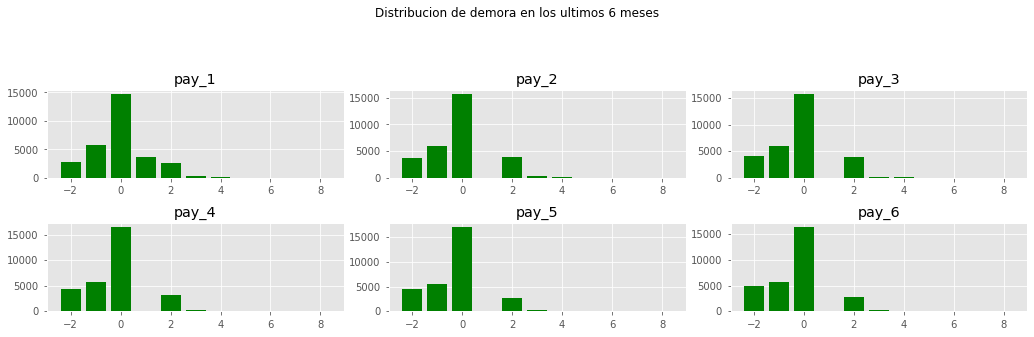

In [10]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribucion de demora en los ultimos 6 meses')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

Operaciones que caen en impago 22.12% de 30000 observaciones


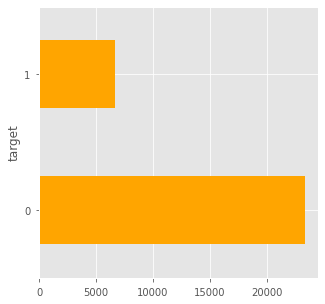

In [11]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()

print("Operaciones que caen en impago {}% de {} observaciones".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')

In [12]:
df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

In [13]:
df['age_cat'] = pd.cut(df['age'], range(0, 100, 5), right=False)

In [14]:
df.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target,age_cat
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,"[20, 25)"
1,120000,F,2,single,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,"[25, 30)"
2,90000,F,2,single,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,"[30, 35)"
3,50000,F,2,married,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,"[35, 40)"
4,50000,M,2,married,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,"[55, 60)"
5,50000,M,1,single,37,0,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,"[35, 40)"
6,500000,M,1,single,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,0,"[25, 30)"
7,100000,F,2,single,23,0,-1,-1,0,0,...,567,380,601,0,581,1687,1542,0,0,"[20, 25)"
8,140000,F,3,married,28,0,0,2,0,0,...,3719,3329,0,432,1000,1000,1000,0,0,"[25, 30)"
9,20000,M,3,single,35,-2,-2,-2,-2,-1,...,13912,0,0,0,13007,1122,0,0,0,"[35, 40)"


In [15]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

In [16]:
df.head(10)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,target,age_cat
0,20000,F,2,married,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,"[20, 25)"
1,120000,F,2,single,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,"[25, 30)"
2,90000,F,2,single,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,"[30, 35)"
3,50000,F,2,married,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,"[35, 40)"
4,50000,M,2,married,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,"[55, 60)"
5,50000,M,1,single,37,0,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,0,"[35, 40)"
6,500000,M,1,single,29,0,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,0,"[25, 30)"
7,100000,F,2,single,23,0,-1,-1,0,0,...,567,380,601,0,581,1687,1542,0,0,"[20, 25)"
8,140000,F,3,married,28,0,0,2,0,0,...,3719,3329,0,432,1000,1000,1000,0,0,"[25, 30)"
9,20000,M,3,single,35,-2,-2,-2,-2,-1,...,13912,0,0,0,13007,1122,0,0,0,"[35, 40)"


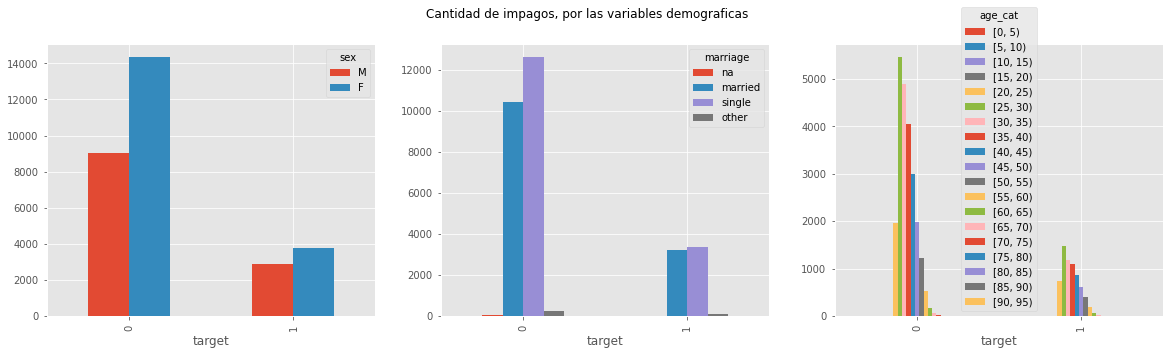

In [17]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Cantidad de impagos, por las variables demograficas')

d = df.groupby(['target', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'age_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

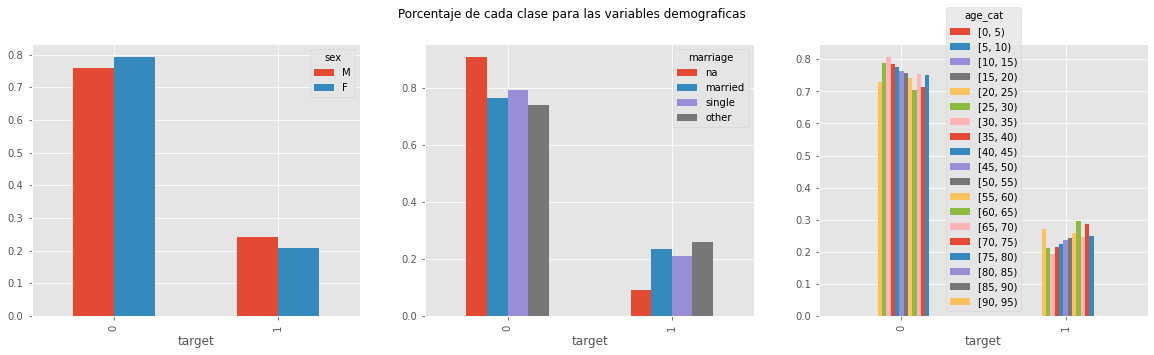

In [18]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Porcentaje de cada clase para las variables demograficas')

d = df.groupby(['target', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['target', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['target', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

In [20]:
# help func
def selcols(prefix, a=1, b=6):
    return [prefix+str(i) for i in np.arange(a,b+1)]

from patsy import dmatrices

formula  = 'target ~ '

# original features
formula += 'C(sex) + C(marriage) +  C(education) + age'
formula += '+' + '+'.join(selcols('pay_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
formula += '+' + 'C(age_cat)'
y, X = dmatrices(formula, data=df, return_type='dataframe')
y = y.iloc[:, 1]

In [21]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

In [22]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

selector = SelectKBest(f_classif)
selector.fit(X, y)

SelectKBest()

In [23]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
X.columns[top_indices]

Index(['pay_1[T.2]', 'pay_2[T.2]', 'pay_3[T.2]', 'pay_4[T.2]', 'pay_5[T.2]',
       'pay_1[T.0]', 'pay_6[T.2]', 'pay_2[T.0]', 'pay_1[T.3]', 'pay_3[T.0]',
       'pay_1[T.1]', 'pay_4[T.0]', 'pay_2[T.3]', 'pay_5[T.0]', 'pay_6[T.0]',
       'pay_6[T.3]', 'pay_3[T.-1]', 'pay_5[T.3]', 'pay_3[T.3]', 'pay_2[T.-1]',
       'pay_4[T.3]', 'pay_4[T.-1]', 'pay_5[T.-1]', 'pay_4[T.7]', 'pay_5[T.7]'],
      dtype='object')

In [24]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [25]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline([('anova', selector), ('scale', scaler)])
preprocess.fit(X,y)

X_prep = preprocess.transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

In [27]:
from sklearn import linear_model

# Create logistic regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LogisticRegression()

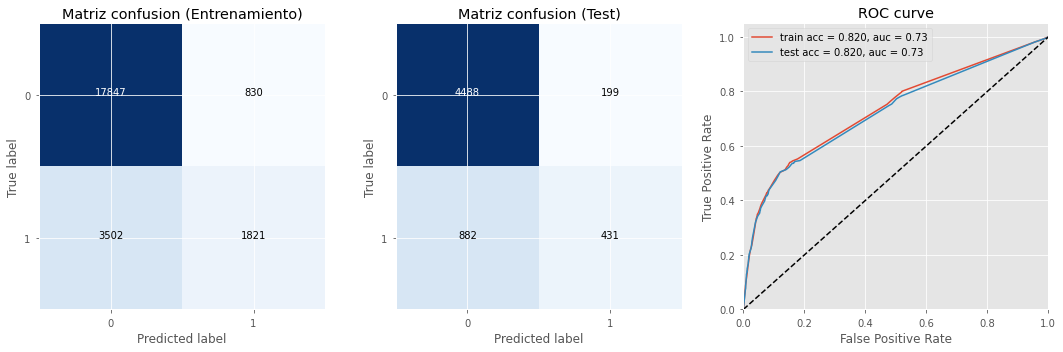

In [28]:
y_train_pred = regr.predict_proba(X_train)[:,1]
y_test_pred = regr.predict_proba(X_test)[:,1]

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Matriz confusion (Entrenamiento)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Matriz confusion (Test)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=500)

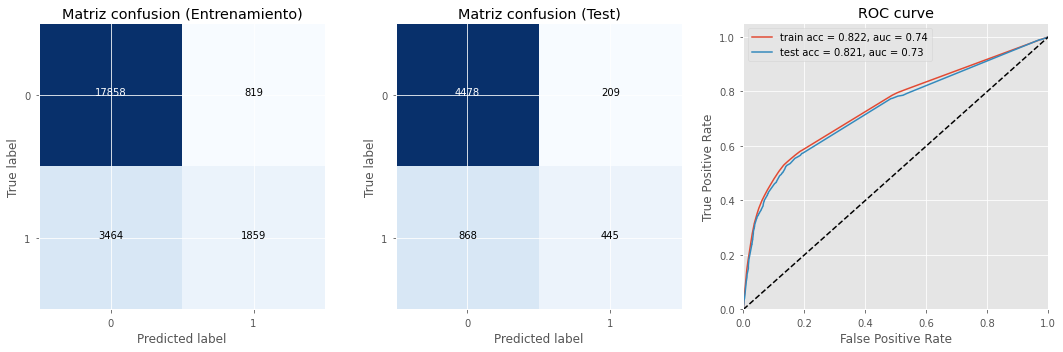

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = rf.predict_proba(X_train)[:,1]
y_test_pred = rf.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Matriz confusion (Entrenamiento)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Matriz confusion (Test)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [31]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_round = 5
evallist  = [(dtest,'eval'), (dtrain,'train')]
param = {'objective':'binary:logistic', 'silent':1, 'eval_metric': ['error', 'logloss']}

bst = xgb.train( param, dtrain, num_round, evallist )

[04:23:47] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-error:0.17983	eval-logloss:0.57978	train-error:0.17917	train-logloss:0.57889
[1]	eval-error:0.17983	eval-logloss:0.52065	train-error:0.17917	train-logloss:0.51893
[2]	eval-error:0.18050	eval-logloss:0.48755	train-error:0.17904	train-logloss:0.48525
[3]	eval-error:0.18033	eval-logloss:0.46887	train-error:0.17888	train-logloss:0.46597
[4]	eval-error:0.18050	eval-logloss:0.45802	train-error:0.17875	train-logloss:0.45481


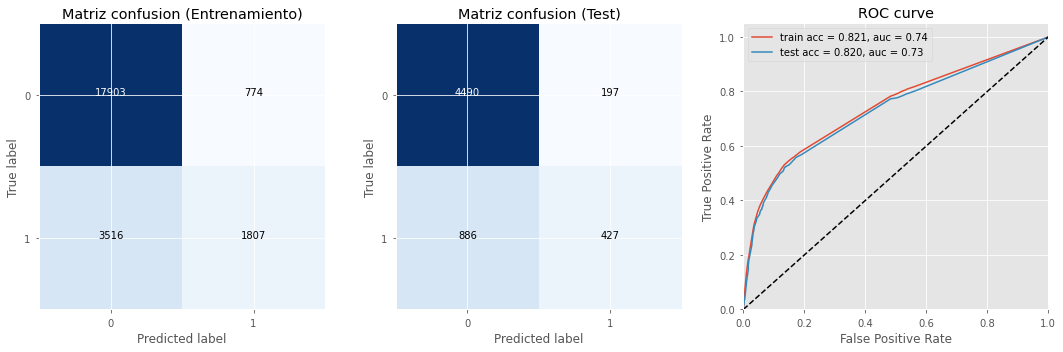

In [32]:
threshold = 0.5
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Matriz confusion (Entrenamiento)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Matriz confusion (Test)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()